# MLE and MAP

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Implement a function taking X and K as input that returns  Phi(X)
# of shape N x K, the Vandermonde Matrix ass. with X.
# Build it column by column
def vander(X, K):
    """
    Given a feature vector X and the parameter K, returns the
    Vandermonde matrix associated with vector X.
    
    Parameters:
        - X: Feature vector to be computed the vandermonde matrix
        - K: Number of columns the matrix should have.

    Returns:
        - Phi: The Vandermonde matrix associated with X.
    """

    N = len(X)
    Phi = np.empty((N, K))

    for i in range(K):
        Phi[:, i] = X**i

    return Phi

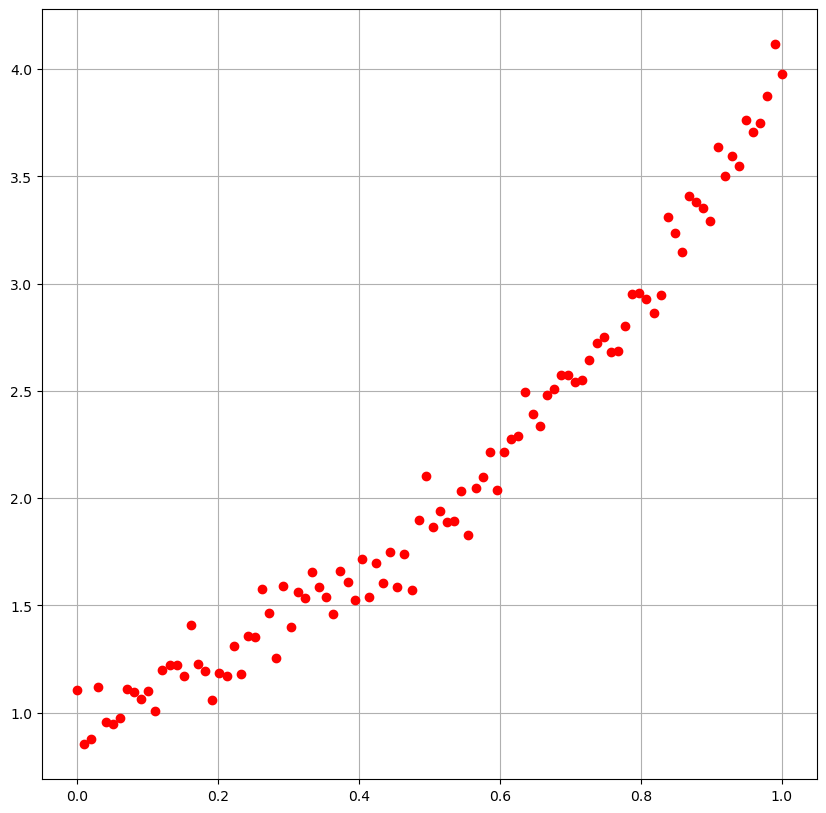

In [64]:
# CREATE A TEST PROBLEM

N = 100 # Number of datapoints
K = 4   # Correct degree+1 of polynomial

# Define the domain
a, b = 0, 1

# Define the true solution
theta_true = np.ones((K,))

# Define the dataset
X = np.linspace(a, b, N)

# Define Y such that theta_true is the solution of Phi(X)*theta = Y
Phi = vander(X, K)
Y = Phi @ theta_true

# CORRUPT Y WITH NOISE
sigma = .1  # Variance of the noise
Y = Y + sigma*np.random.normal(0, 1, Y.shape) # Its the same as defining N(0, sqrt(0.1))

# Plot X against Y, with red dots (not continuous line)
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(X, Y, 'ro')
plt.show()

## MLE

In [65]:
# Given X and Y, compute a solution theta_mle

# Direct solution by Normal Equations
# WRONG, NEVER COMPUTE INVERSE
# theta_mle = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ Y

In [66]:
theta_mle = np.linalg.solve(Phi.T @ Phi, Phi.T @ Y)

# Inefficient!! Phi.T Phi is SPD --> Cholesky

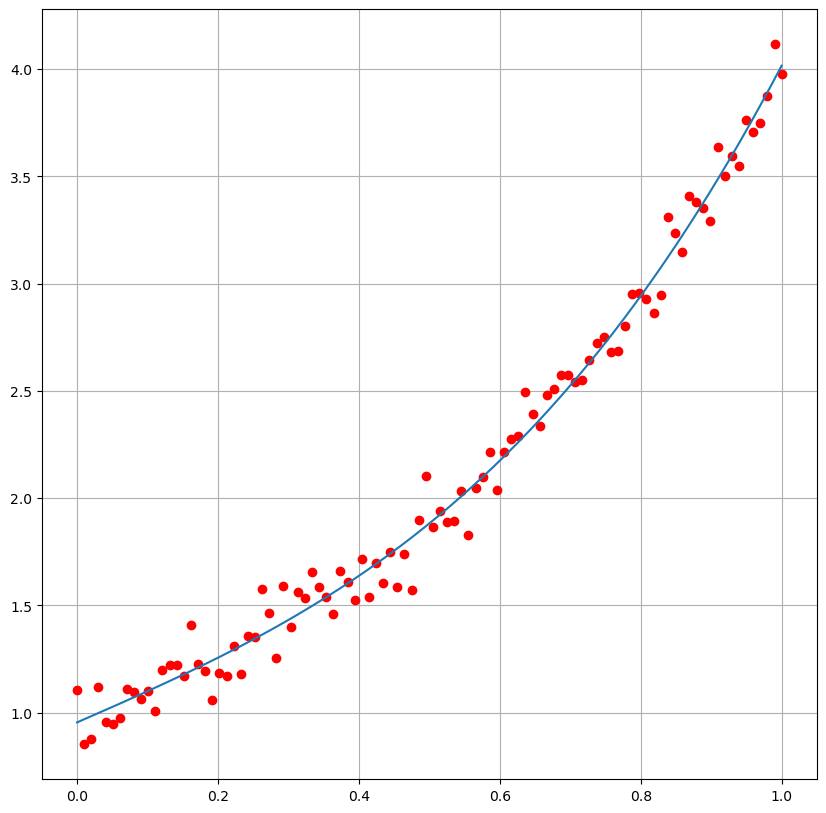

In [67]:
# TODO: Plot f_theta(X) in the same plot of X and Y to check the approximation
# Plot X against Y, with red dots (not continuous line)
XX = np.linspace(a, b, 1000)
YY = vander(XX, K) @ theta_mle

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(X, Y, 'ro')
plt.plot(XX, YY) # plt.plot(X, Phi@theta_mle)
plt.show()

### Underfitting

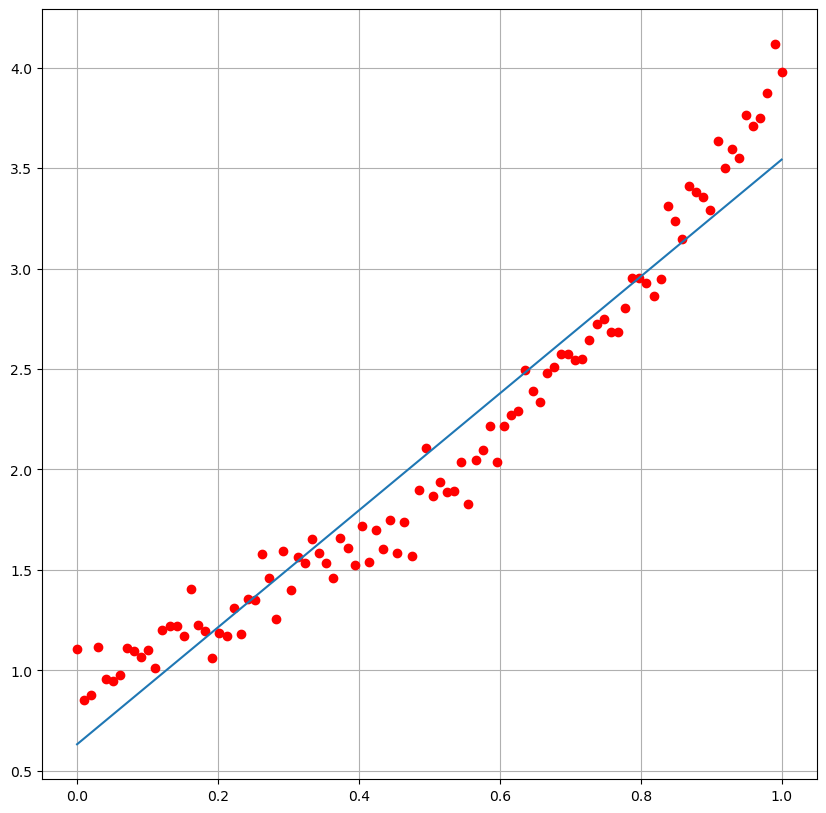

In [68]:
# X and Y are fixed

# Pretend not to know K
K_trial = 2

# Solve MLE with K_trial = 2
Phi_trial = vander(X, K_trial)
theta_mle_trial = np.linalg.solve(Phi_trial.T @ Phi_trial, Phi_trial.T @ Y)

# Plot the model on the same plot of the dataset
XX = np.linspace(a, b, 1000)
YY = vander(XX, K_trial) @ theta_mle_trial

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(X, Y, 'ro')
plt.plot(XX, YY) # plt.plot(X, Phi@theta_mle)
plt.show()

### Overfitting

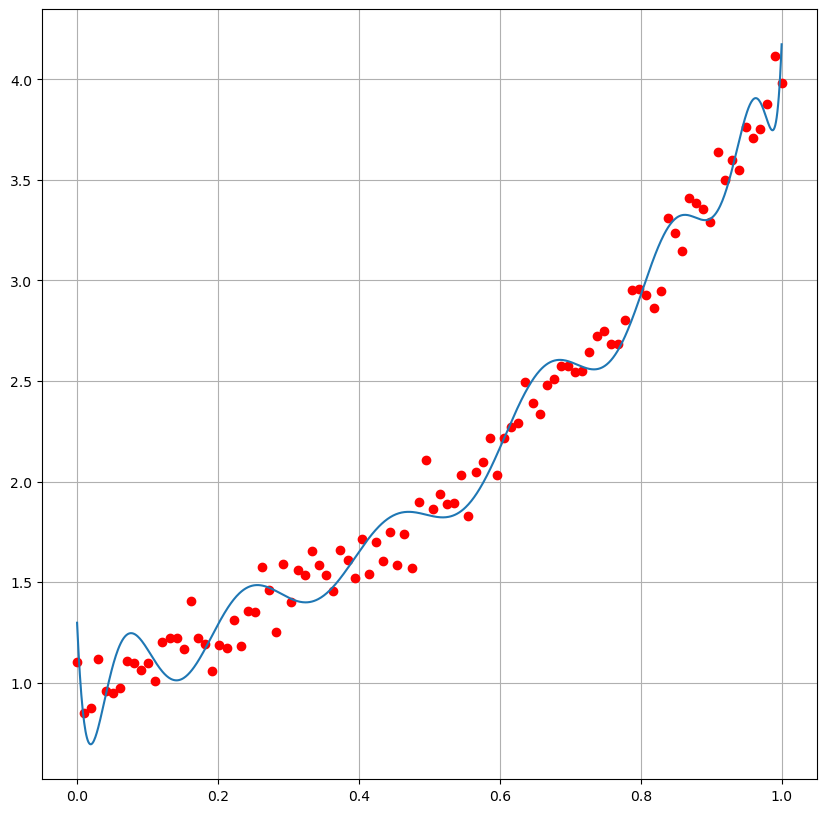

In [75]:
# X and Y are fixed

# Pretend not to know K
K_trial = 20

# Solve MLE with K_trial = 2
Phi_trial = vander(X, K_trial)
theta_mle_trial = np.linalg.solve(Phi_trial.T @ Phi_trial, Phi_trial.T @ Y)

# Plot the model on the same plot of the dataset
XX = np.linspace(a, b, 1000)
YY = vander(XX, K_trial) @ theta_mle_trial

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(X, Y, 'ro')
plt.plot(XX, YY) # plt.plot(X, Phi@theta_mle)
plt.show()

## MAP

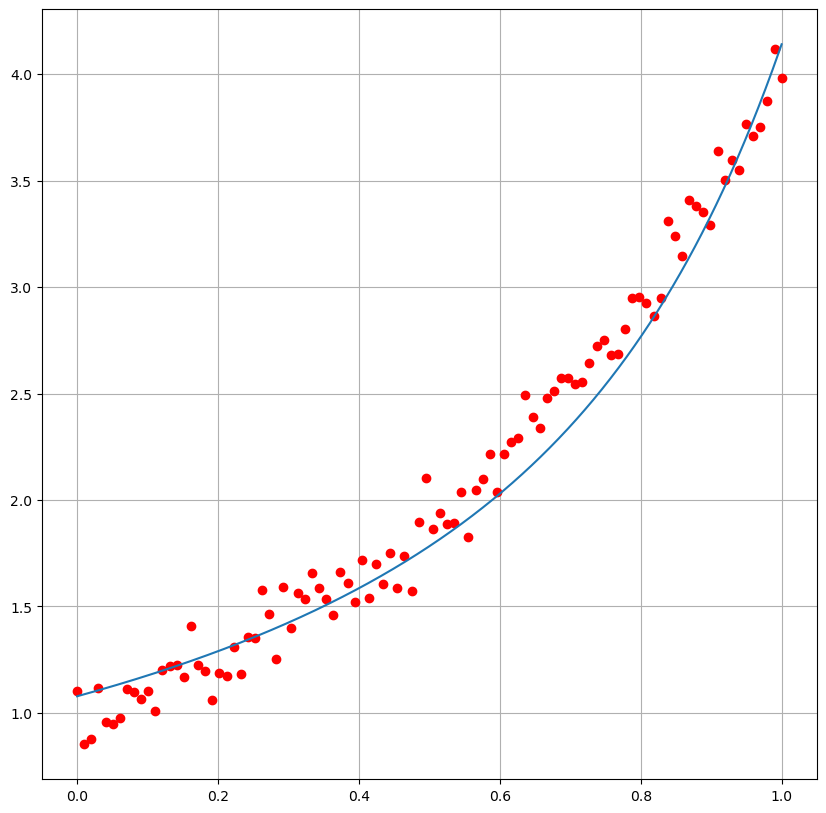

In [82]:
# X and Y are fixed

# Set K_trial
K_trial = 10

# Set lambda (Setting it to 0 will give MLE (?) )
ld = 5

# Compute the vandermonde for the problem
Phi = vander(X, K_trial)

# Solve theta_MAP
theta_MAP = np.linalg.solve(Phi.T @ Phi + ld*np.eye(K_trial), Phi.T @ Y)

# Visualize
XX = np.linspace(a, b, 1000)
YY = vander(XX, K_trial) @ theta_MAP

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(X, Y, 'ro')
plt.plot(XX, YY) # plt.plot(X, Phi@theta_mle)
plt.show()
